# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
#from zipfile import ZipFile 

# Assigning paths

In [2]:
test_dir=r"C:\Users\DELLPC\Desktop\MACHINE_LEARNING\ML_Projects\New folder\Deep Learning\Cats_Dogs_Prediction\dataset\test_set"
train_dir=r"C:\Users\DELLPC\Desktop\MACHINE_LEARNING\ML_Projects\New folder\Deep Learning\Cats_Dogs_Prediction\dataset\training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [3]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4001
number of dogs training images -  4001
number of cats testing images -  1001
number of dogs testing images -  1001


# Convert the RGB images into array of numbers by ImageDataGenerator

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [5]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Assigning layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(126, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout( 0.15))
model.add(Dense( 64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

# Training model

In [8]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 100,
                        epochs = 25,
                        validation_data = testing_data,
                        validation_steps = 100)

Epoch 1/25
100/100 [==============================] - 67s 667ms/step - loss: 0.6940 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.5135
Epoch 2/25
100/100 [==============================] - 69s 688ms/step - loss: 0.6934 - accuracy: 0.5084 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 3/25
100/100 [==============================] - 74s 736ms/step - loss: 0.6915 - accuracy: 0.5138 - val_loss: 0.6877 - val_accuracy: 0.5057
Epoch 4/25
100/100 [==============================] - 73s 728ms/step - loss: 0.6779 - accuracy: 0.5763 - val_loss: 0.6522 - val_accuracy: 0.6457
Epoch 5/25
100/100 [==============================] - 73s 727ms/step - loss: 0.6678 - accuracy: 0.5884 - val_loss: 0.6789 - val_accuracy: 0.5493
Epoch 6/25
100/100 [==============================] - 75s 745ms/step - loss: 0.6511 - accuracy: 0.6247 - val_loss: 0.6754 - val_accuracy: 0.6011
Epoch 7/25
100/100 [==============================] - 76s 757ms/step - loss: 0.6290 - accuracy: 0.6441 - val_loss: 0.6054 - val_ac

# Plotting accuracy and validation accuracy

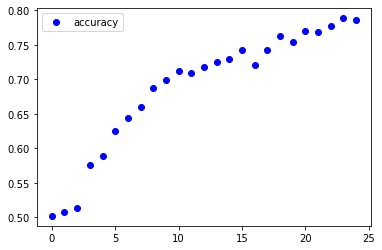

In [9]:
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

# Testing the model

In [10]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Cat'
    else:
        prediction = 'Dog'
    return prediction

In [16]:
print(testing_image(test_dir + '/cats/cat.4007.jpg'))

[[1. 1.]]
Cat


In [19]:
print(testing_image(test_dir + '/dogs/dog.4076.jpg'))

[[0. 1.]]
Dog
